In [115]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 다른 폰트를 기본 폰트로 
from matplotlib.font_manager import FontProperties 
font_path = 'C:/Windows/Fonts/HMFMPYUN.TTF'
font_prop = FontProperties(fname=font_path, size =10)
plt.rc('font', family = font_prop.get_name())

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore')

# 1.

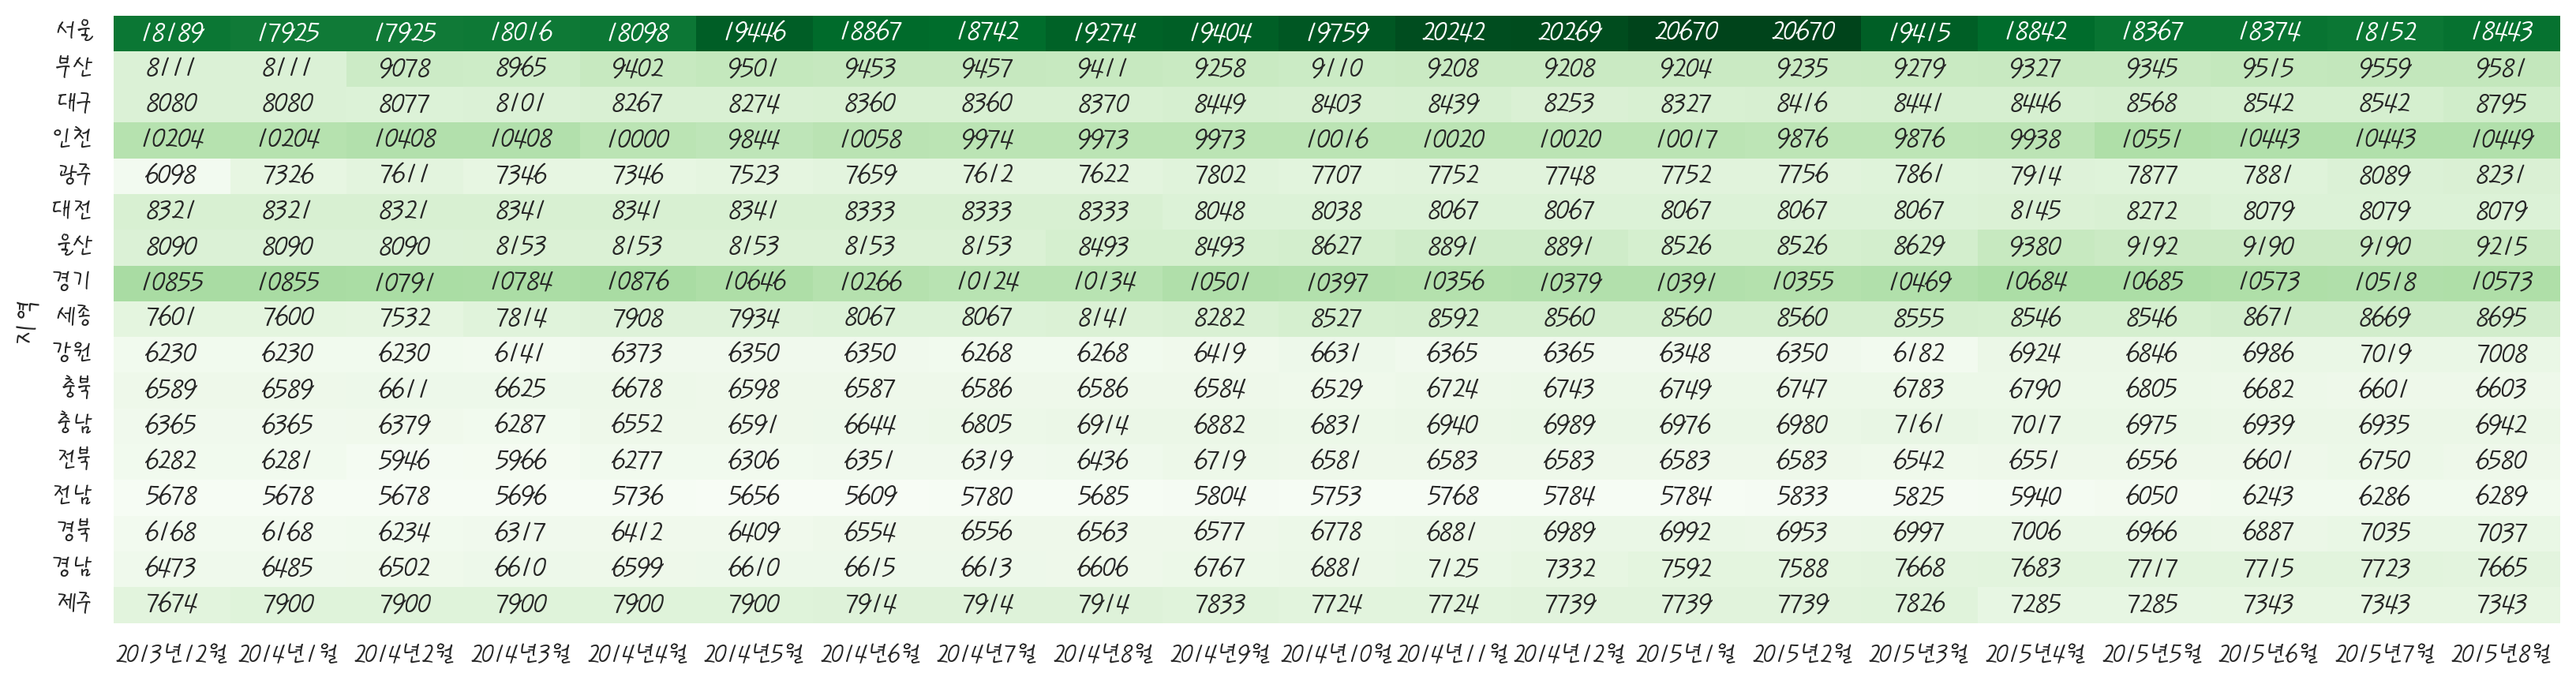

In [15]:
df_first = pd.read_csv('C:/ai/download/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                       encoding = 'cp949')
df_first_heat = df_first.set_index('지역')
plt.figure(figsize=(20,5))
sns.heatmap(df_first_heat, annot = True, fmt = 'd', cmap = 'Greens', cbar = False)
plt.xticks(rotation=0)
plt.ylabel('지역')
plt.show()

# 2.

In [103]:
df_last = pd.read_csv ('C:/ai/download/shareData/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                       encoding = 'cp949')
#전용면적 column에 text 수정
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')\
                                      .str.replace('제곱미터','m²')\
                                      .str.replace('초과','~')\
                                      .str.replace('이하','')\
                                      .str.replace(' ','')

#분양가격(제곱미터) 결측치 및 에러 수정 
df_last['분양가격(제곱미터)'] =  pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',',''))

#평당분양가격으로 환산 
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3


#분양가격(제곱미터)column , 규모구분 column 삭제

df_last.drop(['규모구분','분양가격(제곱미터)'],axis=1,inplace=True)

df_last


,지역명,연도,월,전용면적,평당분양가격
0,서울,2015,10,모든면적,19275.3
1,서울,2015,10,60m²,18651.6
2,서울,2015,10,60m²~85m²,19410.6
3,서울,2015,10,85m²~102m²,18879.3
4,서울,2015,10,102m²~,19400.7
...,...,...,...,...,...
9090,제주,2024,8,모든면적,25419.9
9091,제주,2024,8,60m²,NaN
9092,제주,2024,8,60m²~85m²,24799.5
9093,제주,2024,8,85m²~102m²,NaN


# 3.

In [102]:
df_last.pivot_table(index='연도',
               columns='지역명',
               values='평당분양가격',
              aggfunc='mean')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


# 4.

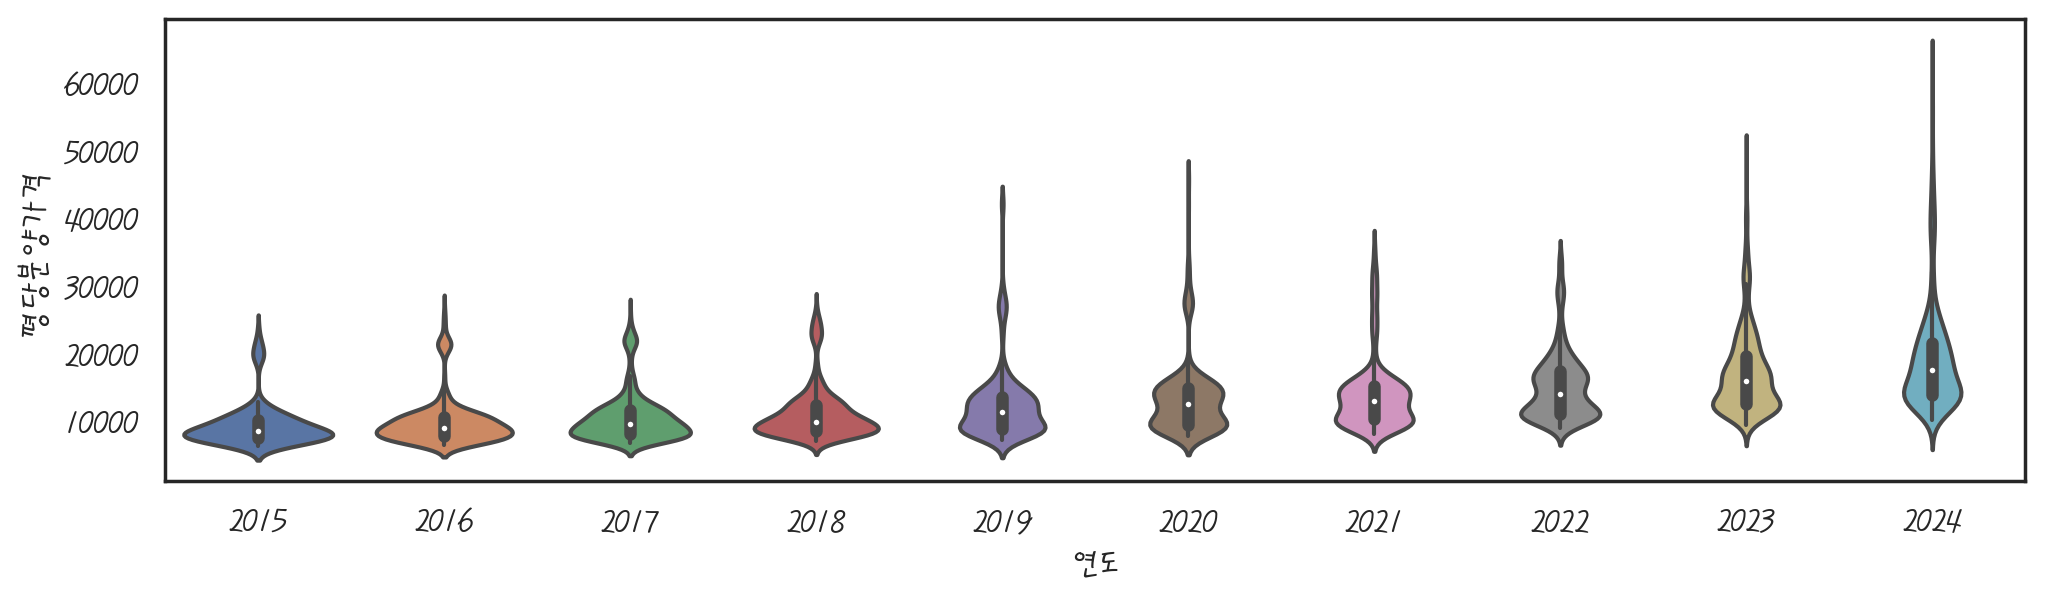

In [76]:
sns.violinplot(data = df_last,x='연도', y='평당분양가격')
plt.show()

# 5.

In [89]:
df_first

# 지역==>지역명 이름 변경
df_first= df_first.rename(columns = {'지역':'지역명'})

#연 월 분리 
new_first = df_first.melt(id_vars='지역명',
                          var_name='연도월',
                          value_name='평당분양가격')
parse_year = lambda datestr : int(datestr.split('년')[0])
parse_month = lambda datestr : int(datestr.split('년')[-1][:-1])
new_first['연도'] = new_first['연도월'].map(parse_year)

new_first['월'] = new_first['연도월'].map(parse_month)

new_first.drop('연도월',axis=1,inplace=True)

In [99]:
new_first

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12
...,...,...,...,...
352,전북,6580,2015,8
353,전남,6289,2015,8
354,경북,7037,2015,8
355,경남,7665,2015,8


In [107]:
new_last = df_last[df_last['전용면적']=='모든면적']

In [110]:
new_last.drop('전용면적',axis=1,inplace=True)

In [111]:
df = pd.concat ([new_first,new_last]).reset_index(drop=True)

In [112]:
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2171,전북,12058.2,2024,8
2172,전남,13120.8,2024,8
2173,경북,13827.0,2024,8
2174,경남,13252.8,2024,8
